In [1]:
# Data source: https://www.dukascopy.com/swiss/english/marketwatch/historical/
import numpy as np
import pandas as pd
%matplotlib inline

In [22]:
from pathlib import Path
csvpath = Path('../Resources/MSFT.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head(10)

,Close
Date,
1990-01-02 16:00:00,0.62
1990-01-03 16:00:00,0.62
1990-01-04 16:00:00,0.64
1990-01-05 16:00:00,0.62
1990-01-08 16:00:00,0.63
1990-01-09 16:00:00,0.63
1990-01-10 16:00:00,0.61
1990-01-11 16:00:00,0.60
1990-01-12 16:00:00,0.60


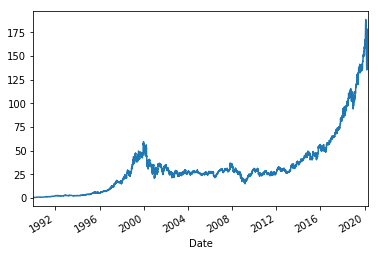

In [23]:
# Hourly EUR to USD exchange rates
df.Close.plot()

In [27]:
# Hourly percentage changes in exchange rate (resampled to daily)
df['Return'] = df.Close.pct_change() * 100 * 24
df = df.resample('D').mean()
df = df.dropna()
df.head()

,Close,Return
Date,,
1990-01-04,77.419355,inf
1990-01-05,-75.000000,-4725.000000
1990-01-08,38.709677,-3638.709677
1990-01-09,0.000000,-2400.000000
1990-01-10,-76.190476,-inf


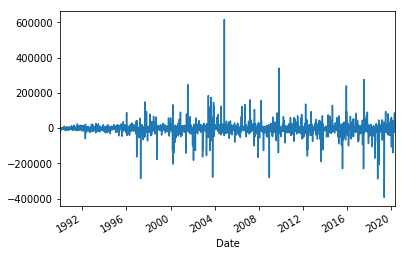

In [28]:
df.Return.plot()

# GARCH

In [29]:
import arch as arch
from arch import arch_model

In [33]:
# Create the GARCH model
model = arch_model(df['Return'], mean="zero", vol="GARCH", p=2, q=2)
results = model.fit(disp="off")

C:\Users\tbrod\Anaconda3\envs\PyViz\lib\site-packages\arch\univariate\volatility.py:1103: RuntimeWarning: invalid value encountered in double_scalars
  scale = np.mean(resids ** 2) / (target ** (2.0 / power))
C:\Users\tbrod\Anaconda3\envs\PyViz\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\tbrod\Anaconda3\envs\PyViz\lib\site-packages\arch\univariate\mean.py:557: RuntimeWarning: invalid value encountered in double_scalars
  return 1.0 - e.T.dot(e) / y.dot(y)


In [31]:
# Output the model summary
results.summary()

C:\Users\tbrod\Anaconda3\envs\PyViz\lib\site-packages\arch\univariate\mean.py:640: RuntimeWarning: invalid value encountered in subtract
  scores[:, -1] = e ** 2.0 - sigma2
C:\Users\tbrod\Anaconda3\envs\PyViz\lib\site-packages\arch\univariate\volatility.py:450: RuntimeWarning: overflow encountered in multiply
  var_bounds = np.vstack((var_bound / 1e6, var_bound * 1e6)).T
C:\Users\tbrod\Anaconda3\envs\PyViz\lib\site-packages\numpy\core\_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
C:\Users\tbrod\Anaconda3\envs\PyViz\lib\site-packages\arch\univariate\volatility.py:454: RuntimeWarning: invalid value encountered in less
  var_bounds[var_bounds[:, 0] < lower_bound, 0] = lower_bound
C:\Users\tbrod\Anaconda3\envs\PyViz\lib\site-packages\arch\univariate\base.py:129: RuntimeWarning: invalid value encountered in sign
  scale = np.sign(scale) * np.ceil(np.abs(scale))
C:\Users\tbrod\Anaconda3\envs\PyViz\lib\site-packages\s

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Return   R-squared:                         nan
Mean Model:                 Zero Mean   Adj. R-squared:                    nan
Vol Model:                      GARCH   Log-Likelihood:                    nan
Distribution:                  Normal   AIC:                               nan
Method:            Maximum Likelihood   BIC:                               nan
                                        No. Observations:                 7611
Date:                Sat, May 09 2020   Df Residuals:                     7606
Time:                        17:32:56   Df Model:                            5
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega             nan        nan        nan        nan [    nan,    nan]
alpha[1]   5.0000e-03        nan        nan        nan [    nan,    nan]
alpha[2]   5.0000e-03        nan        nan        nan [    nan,    nan]
beta[1]        0.2450        nan        nan        nan [    nan,    nan]
beta[2]        0.2450        nan        nan        nan [    nan,    nan]
========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""

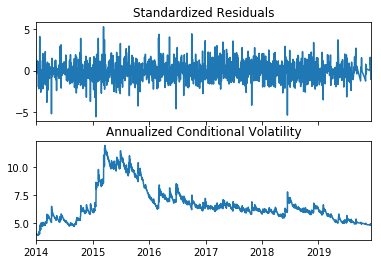

In [15]:
# Plot the model estimate of the annualized volatility
plot = results.plot(annualize='D')

# Forecasting from GARCH

In [16]:
# Find the last day of the dataset
last_day = df.index.max().strftime('%Y-%m-%d')
last_day

'2019-12-08'

In [17]:
# Create a 5 day forecast of EUR to USD exchange rate volatility
forecast_horizon = 3

# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.

forecasts = results.forecast(start=last_day, horizon=forecast_horizon)
forecasts

In [18]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3
Gmt time,,,
2019-12-08,4.86332,4.877845,4.883856


# Visualizing the forecast

In [19]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Gmt time,2019-12-08 00:00:00
h.1,4.863320
h.2,4.877845
h.3,4.883856


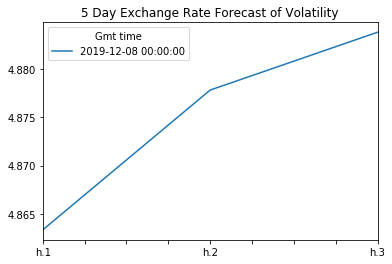

In [20]:
# Plot the final forecast
final.plot(title="5 Day Exchange Rate Forecast of Volatility")

Question: Is the exchange rate risk expected to increase or decrease over the next 5 days?

Answer: # YOUR ANSWER HERE!

In [21]:
#increase